# DATA ANALYSIS OF ZOMATO RESTAURANTS IN BANGALORE

In [1]:
#Importing all the necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the file
df = pd.read_csv('zomato.csv')
df.head(10) # inspecting the first 10 rows

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [3]:
df.info() #general overview of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.drop(['url','phone', 'address', 'menu_item', 'reviews_list'], axis = 1, inplace = True)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
#checking duplicate value
df.duplicated().sum()

108

In [9]:
# dropping the duplicates value from the dataset
df.drop_duplicates(inplace=True)

In [10]:
#renaming the columns
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

In [11]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate             7755
votes               0
location           21
rest_type         227
dish_liked      28014
cuisines           45
cost              344
type                0
city                0
dtype: int64

In [12]:
df.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
dish_liked      object
cuisines        object
cost            object
type            object
city            object
dtype: object

### Cleaning the 'rate' column
removing string elements, 
converting to float, 
replacing NaN with mean 

In [13]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
df['rate'] = df['rate'].apply(lambda x: str(x).replace('/5','') if '/5' in str(x) else str(x))
df['rate'] = pd.to_numeric(df['rate'],errors='coerce')
df.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51609, dtype: float64

In [15]:
#Another method to remove the string keywords. 
#The above method replaces the string keywords with NaN values. Whereas this method removes the rows.

#df = df.loc[df.rate !='NEW']
#df = df.loc[df.rate !='-'].reset_index(drop=True)
#df.rate = df.rate.apply(lambda x: x.replace('/5', '') if type(x) == np.str else x).str.strip().astype('float')
#df['rate']

In [16]:
df[df.rate>5]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city


### Cleaning the cost column

In [17]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
df.cost = df.cost.apply(lambda x: str(x).replace(',','')).astype(float)

In [19]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [20]:
df.dish_liked.isnull().sum()

28014

In [21]:
b=[]
for d in df.dish_liked[df.dish_liked.isnull() == False]:
       a=d.split(',')
       for i in a:
             i=i.strip()
             b.append(i)

In [22]:
a = [(idx, item) for idx,item in enumerate(b)]
dishes = pd.DataFrame(a, columns= ('index','dish'))
top_5_dish = dishes.dish.value_counts().head()
top_5_dish

Pasta        3397
Burgers      3015
Cocktails    2813
Pizza        2723
Biryani      2086
Name: dish, dtype: int64

In [23]:
df.dish_liked.fillna('Pasta, Burgers, Cocktails, Pizza, Biryani', inplace= True)
df.dish_liked.isnull().sum()

0

In [24]:
df.dropna(inplace= True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  bool   
 2   book_table    41190 non-null  bool   
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  object 
 6   rest_type     41190 non-null  object 
 7   dish_liked    41190 non-null  object 
 8   cuisines      41190 non-null  object 
 9   cost          41190 non-null  float64
 10  type          41190 non-null  object 
 11  city          41190 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 3.5+ MB


In [26]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())
df_en

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,0,0,0,4.1,775,0,0,0,0,800.0,0,0
1,1,0,1,4.1,787,0,0,1,1,800.0,0,0
2,2,0,1,3.8,918,0,1,2,2,800.0,0,0
3,3,1,1,3.7,88,0,2,3,3,300.0,0,0
4,4,1,1,3.8,166,1,0,4,4,600.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51709,2699,1,1,3.7,34,25,28,6,204,800.0,6,29
51711,1716,1,1,2.5,81,25,28,5194,761,800.0,6,29
51712,6532,1,1,3.6,27,25,17,6,240,1500.0,6,29
51715,6568,1,0,4.3,236,56,17,5190,237,2500.0,6,29


In [27]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  int64  
 1   online_order  41190 non-null  int64  
 2   book_table    41190 non-null  int64  
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  int64  
 6   rest_type     41190 non-null  int64  
 7   dish_liked    41190 non-null  int64  
 8   cuisines      41190 non-null  int64  
 9   cost          41190 non-null  float64
 10  type          41190 non-null  int64  
 11  city          41190 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 4.1 MB


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

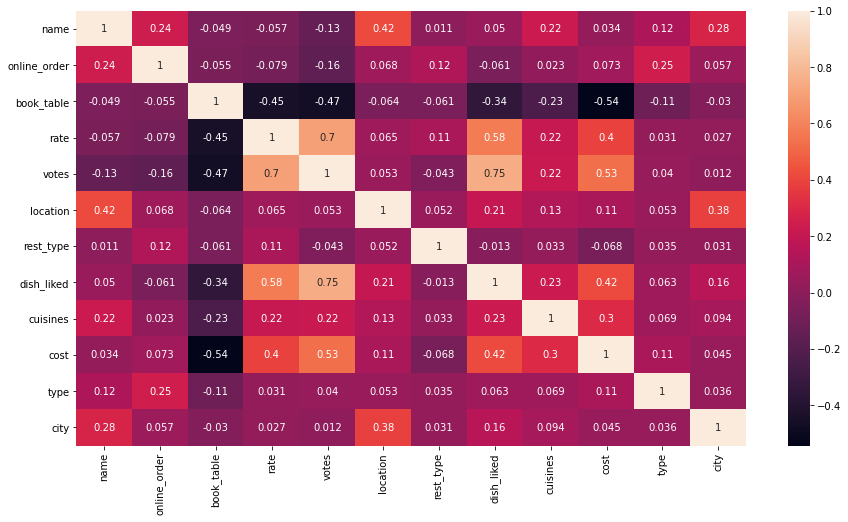

In [28]:
corr = df_en.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_en.columns

## EXPLORATORY DATA ANALYSIS

### Comparison of offline and online stores

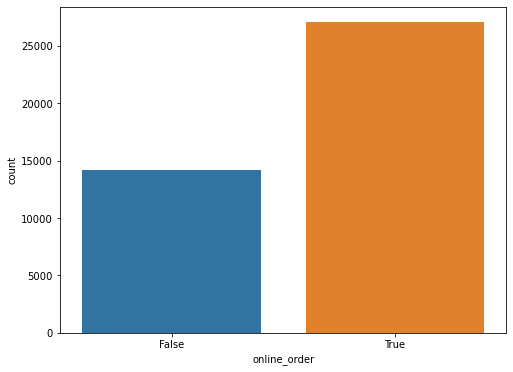

In [29]:
plt.figure(figsize=[8,6])
sns.countplot(df['online_order'])
plt.show()

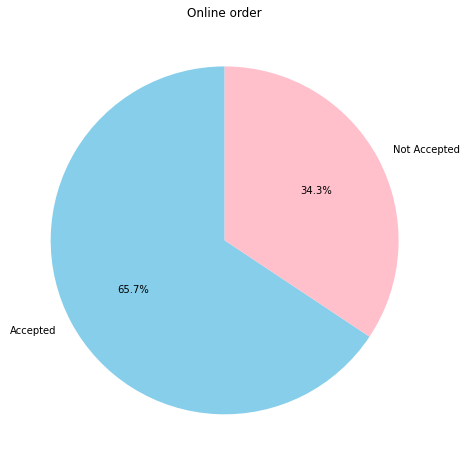

In [30]:
plt.figure(figsize=[10,8])
plt.pie(df['online_order'].value_counts(), labels=['Accepted', 'Not Accepted'], autopct='%1.1f%%', colors=['skyblue', 'pink'],
        startangle=90)
plt.title('Online order')
plt.show()

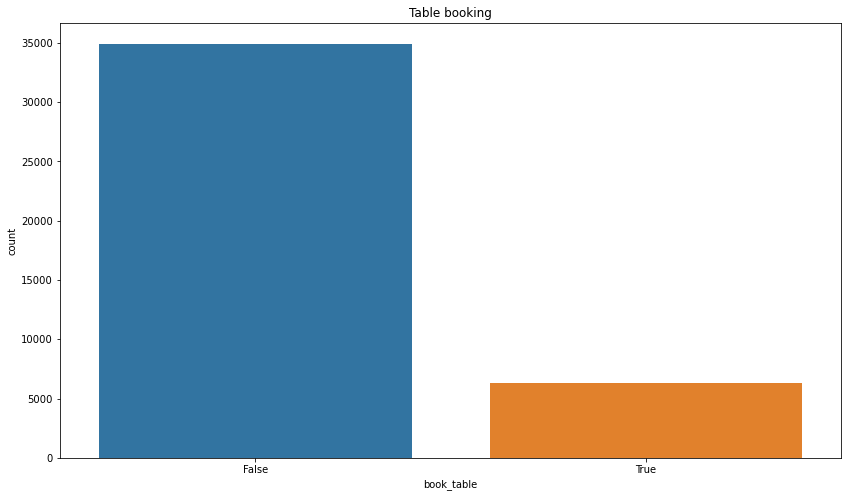

In [31]:
plt.figure(figsize=[14,8])
sns.countplot(df['book_table'])
plt.title('Table booking')
plt.show()

In [32]:
pd.crosstab(df['rate'], df['book_table']).head()

book_table,False,True
rate,,
1.8,5,0
2.0,11,0
2.1,24,0
2.2,13,13
2.3,51,0


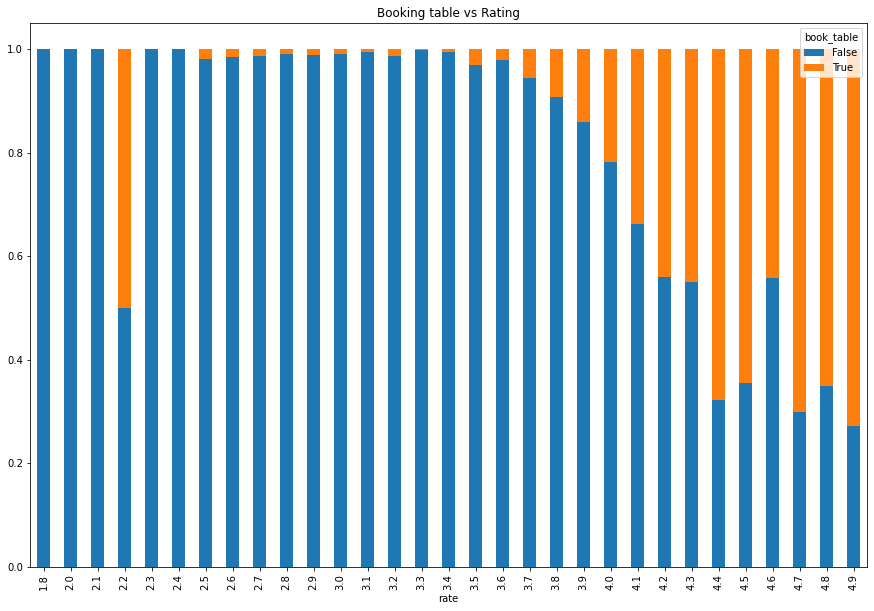

In [33]:
plt.rcParams['figure.figsize'] = (15, 10)
cr= pd.crosstab(df['rate'], df['book_table'])
cr.div(cr.sum(1).astype(float),axis=0).plot(kind='bar', stacked = True)
plt.title('Booking table vs Rating')
plt.show()

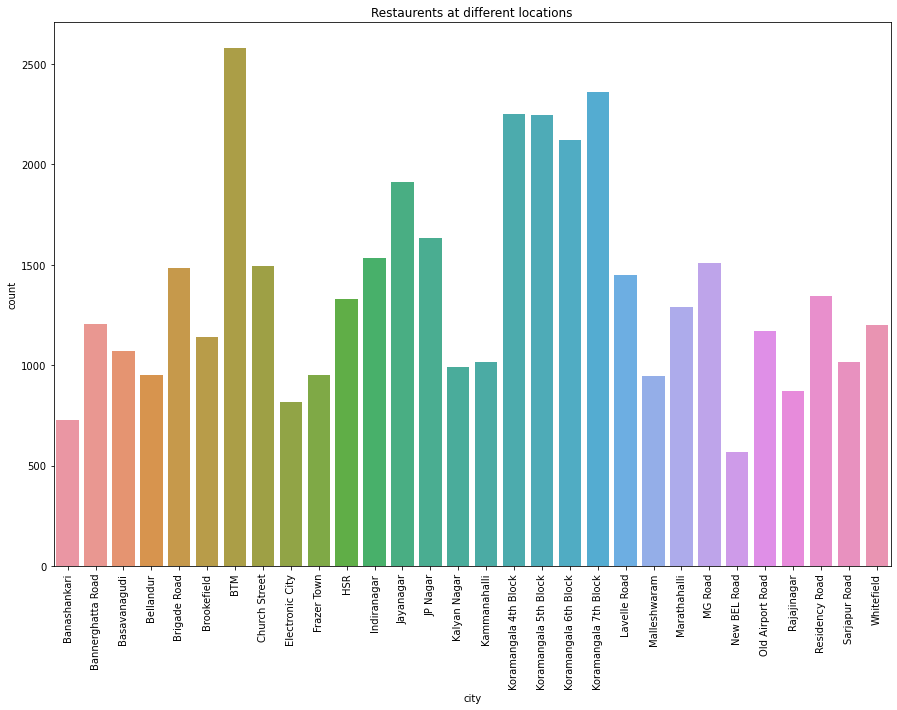

In [34]:
sns.countplot(df['city'])
plt.xticks(rotation =90)
plt.title('Restaurents at different locations')
plt.show()

BTM has the highest number of restaurents.

In [35]:
df.type.value_counts()

Delivery              20406
Dine-out              14050
Desserts               2709
Cafes                  1511
Drinks & nightlife     1038
Buffet                  846
Pubs and bars           630
Name: type, dtype: int64

In [36]:
df.type.value_counts(normalize=True)*100

Delivery              49.541151
Dine-out              34.110221
Desserts               6.576839
Cafes                  3.668366
Drinks & nightlife     2.520029
Buffet                 2.053897
Pubs and bars          1.529497
Name: type, dtype: float64

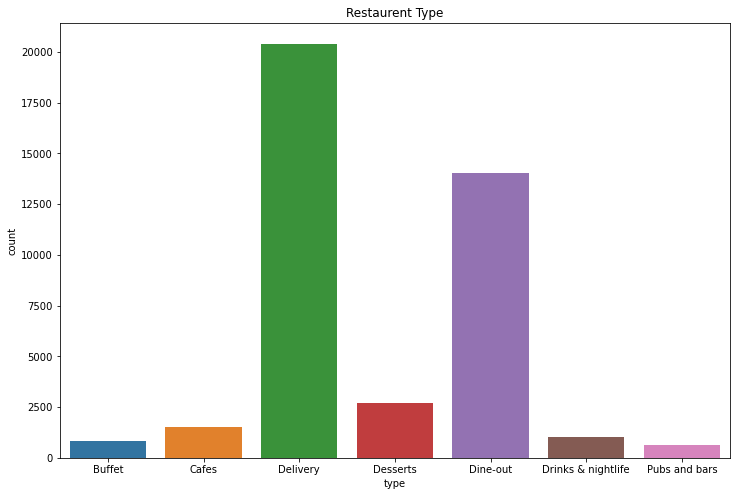

In [37]:
plt.figure(figsize=[12,8])
sns.countplot(df.type)
plt.title('Restaurent Type')
plt.show()

Delivery and Dine-out's are more popular than others

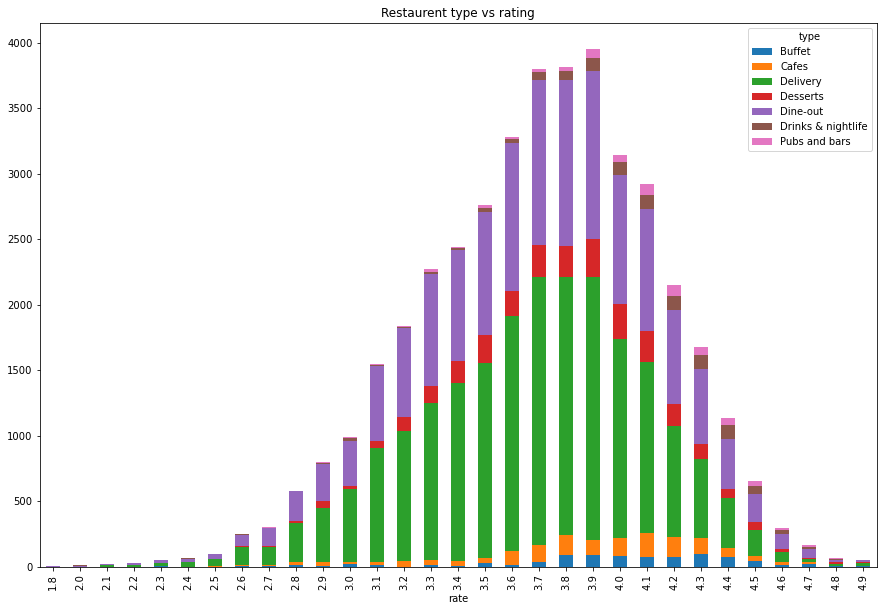

In [38]:
pd.crosstab(df.rate, df.type).plot(kind='bar',stacked=True)
plt.title('Restaurent type vs rating')
plt.show()

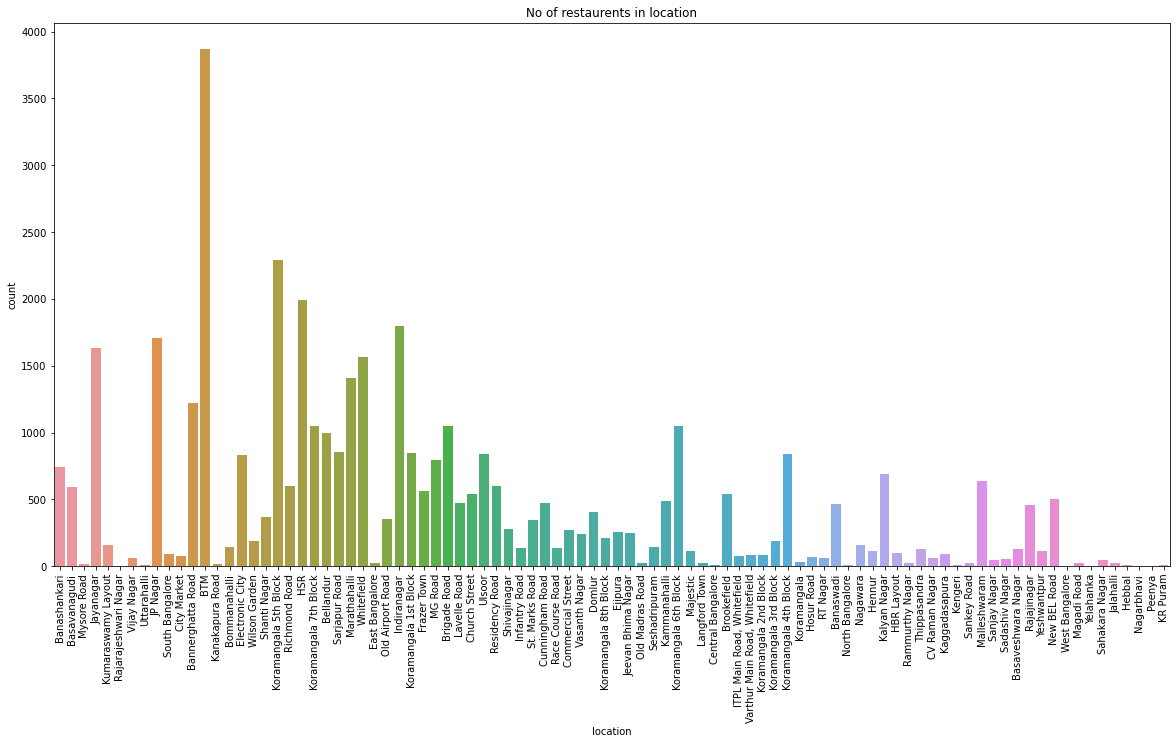

In [39]:
plt.figure(figsize=[20,10])
sns.countplot(df.location)
plt.title('No of restaurents in location')
plt.xticks(rotation=90)
plt.show()

In [40]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

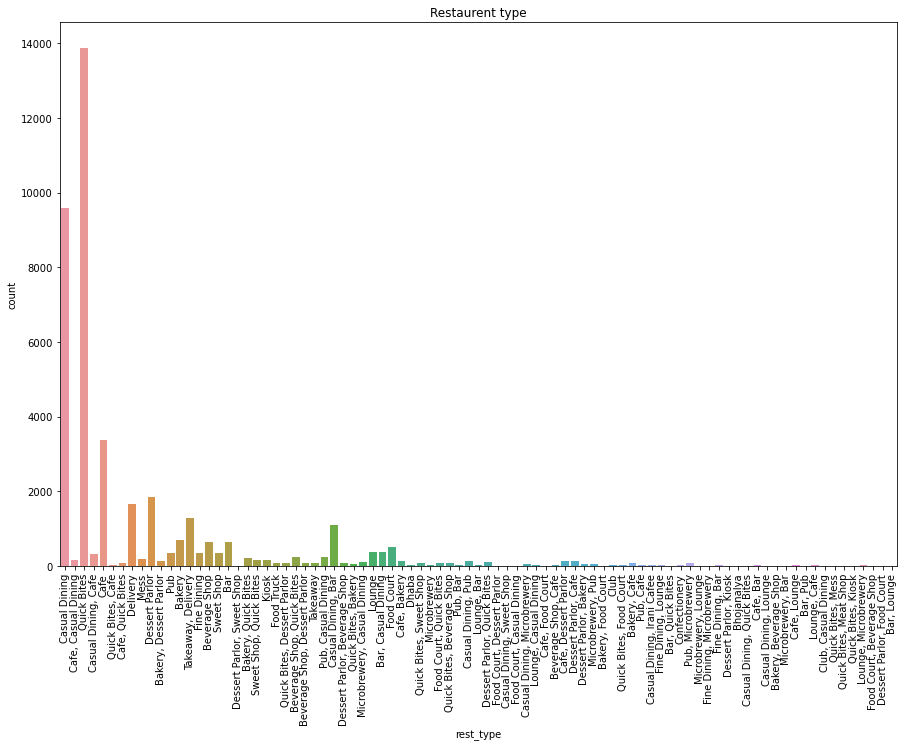

In [41]:
sns.countplot(df['rest_type'])
plt.title('Restaurent type')
plt.xticks(rotation=90)
plt.show()

Quick-Bites and casual dining are the most popular restaurent type

In [42]:
df['name'].value_counts()[:20]

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Kanti Sweets         68
Five Star Chicken    68
Just Bake            68
Baskin Robbins       62
Petoo                60
Kfc                  60
Pizza Hut            60
Mcdonald'S           59
Subway               59
Domino'S Pizza       59
Smoor                59
Polar Bear           58
Sweet Truth          58
Faasos               56
Beijing Bites        56
Burger King          55
Keventers            54
Name: name, dtype: int64

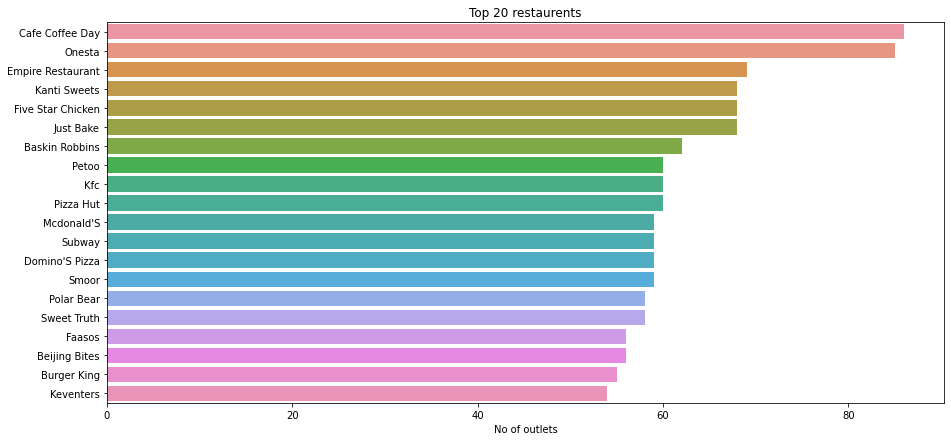

In [43]:
plt.figure(figsize=[15,7])
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index)
plt.title('Top 20 restaurents')
plt.xlabel('No of outlets')
plt.show()

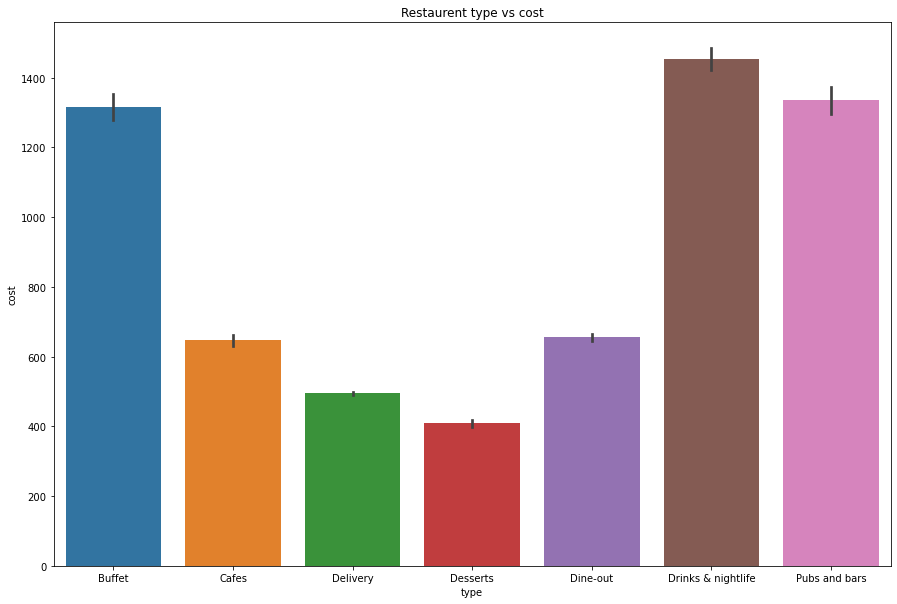

In [44]:
sns.barplot(df.type,df.cost)
plt.title('Restaurent type vs cost')
plt.show()

Drinks and nightlife is expensive, next folows Buffet and Pubs and bars

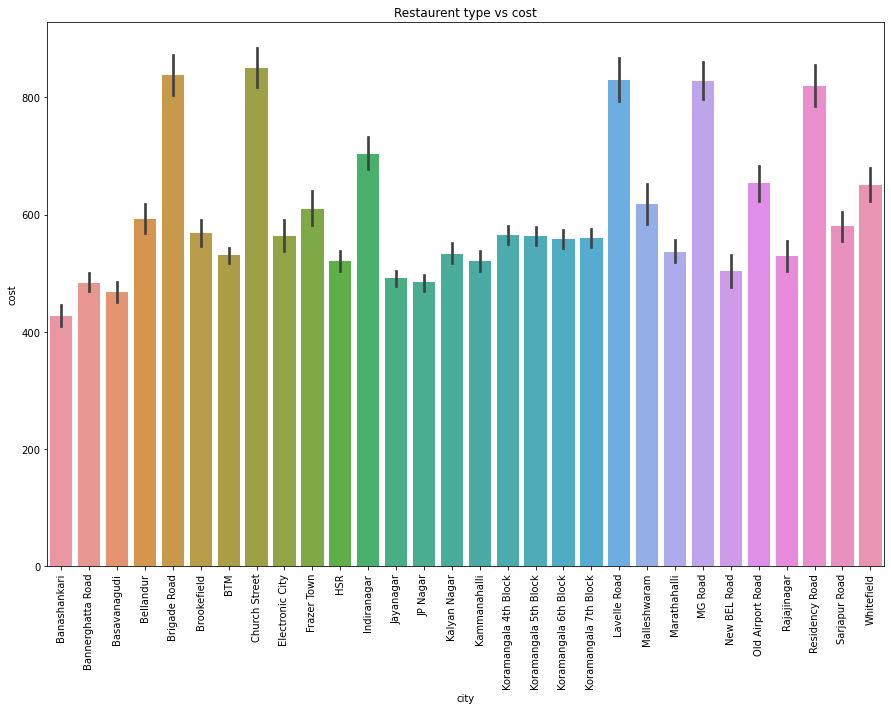

In [45]:
sns.barplot(df.city,df.cost)
plt.xticks(rotation=90)
plt.title('Restaurent type vs cost')
plt.show()

The Church street's restaurents are expensive and next follows Brigade road, Lavelle road,MG road, and Residency road

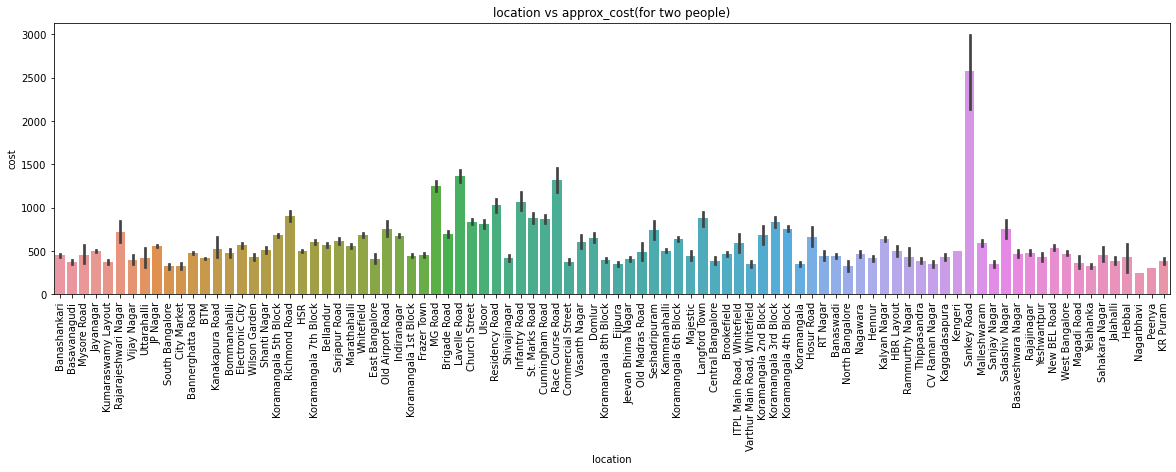

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(df['location'],df.cost)
plt.xticks(rotation=90)
plt.title('location vs approx_cost(for two people)')
plt.show()

The restaurents in Sankey road are expensive

Lets dive deep into the data.
1) which type of restaurents fall under below rating==2

In [47]:
df_rate= df[df['rate']<=2]
df_rate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
5963,Fusion Lounge,False,False,2.0,395,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500.0,Dine-out,Brigade Road
6300,Alibi - Maya International Hotel,False,False,1.8,224,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200.0,Dine-out,Brigade Road
6598,Fusion Lounge,False,False,2.0,395,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500.0,Drinks & nightlife,Brigade Road
12540,Alibi - Maya International Hotel,False,False,1.8,224,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200.0,Dine-out,Church Street
12699,Fusion Lounge,False,False,2.0,396,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500.0,Dine-out,Church Street
13259,Fusion Lounge,False,False,2.0,396,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500.0,Drinks & nightlife,Church Street
38751,Fusion Lounge,False,False,2.0,397,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500.0,Dine-out,Lavelle Road
38870,Alibi - Maya International Hotel,False,False,1.8,225,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200.0,Dine-out,Lavelle Road
40698,Bhagini,False,False,2.0,259,Marathahalli,Casual Dining,"Naan, Pot Biryani, Chicken Guntur, Paneer Tikk...","Andhra, South Indian, Chinese, North Indian",800.0,Delivery,Marathahalli
41592,Bhagini,False,False,2.0,259,Marathahalli,Casual Dining,"Naan, Pot Biryani, Chicken Guntur, Paneer Tikk...","Andhra, South Indian, Chinese, North Indian",800.0,Dine-out,Marathahalli


In [48]:
df_low_rating= df.sort_values('rate')
df_low_rating

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
12540,Alibi - Maya International Hotel,False,False,1.8,224,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200.0,Dine-out,Church Street
6300,Alibi - Maya International Hotel,False,False,1.8,224,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200.0,Dine-out,Brigade Road
43489,Alibi - Maya International Hotel,False,False,1.8,225,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200.0,Dine-out,MG Road
48390,Alibi - Maya International Hotel,False,False,1.8,225,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200.0,Dine-out,Residency Road
38870,Alibi - Maya International Hotel,False,False,1.8,225,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200.0,Dine-out,Lavelle Road
...,...,...,...,...,...,...,...,...,...,...,...,...
47987,Belgian Waffle Factory,True,False,4.9,1749,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Desserts,Residency Road
23587,Ab'S - Absolute Barbecues,False,True,4.9,6404,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600.0,Dine-out,JP Nagar
7118,Punjab Grill,True,False,4.9,518,Whitefield,Casual Dining,"Kadai Paneer, Kulfi, Kadhai Paneer, Dahi Kebab...",North Indian,2000.0,Delivery,Brookefield
32436,Asia Kitchen By Mainland China,True,True,4.9,2244,Koramangala 5th Block,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Delivery,Koramangala 6th Block


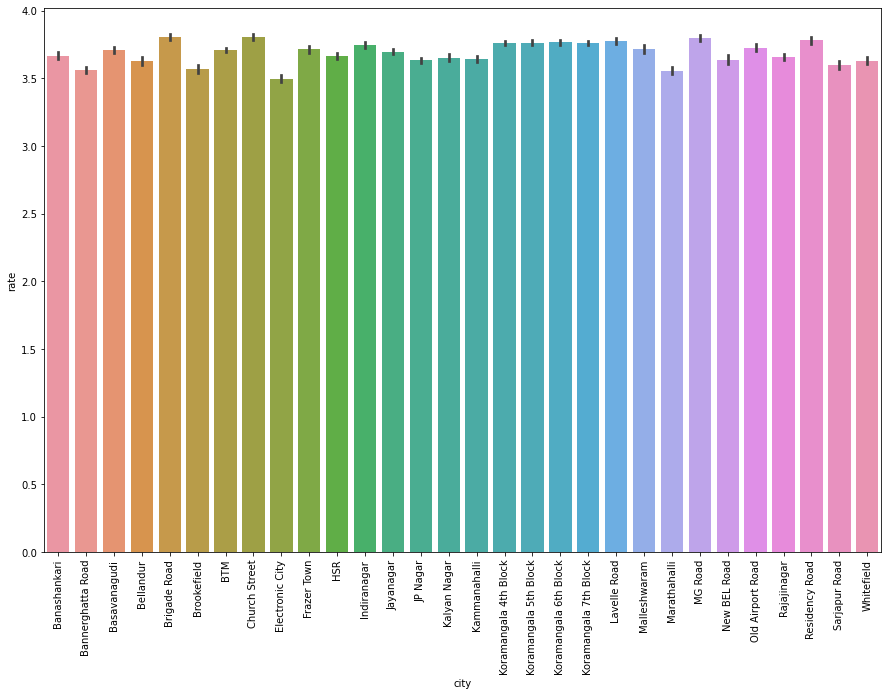

In [49]:
sns.barplot(df.city, df.rate)
plt.xticks(rotation=90);

In [50]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

Text(0.5, 1.0, 'Top 20 cuisines')

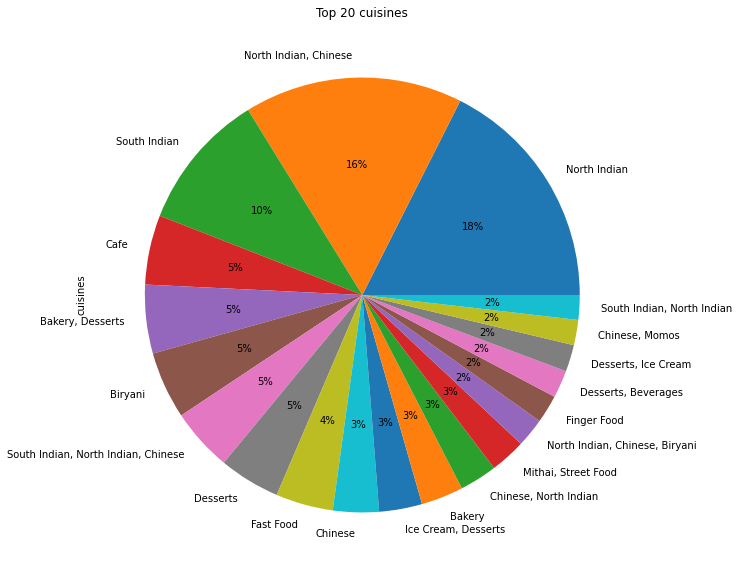

In [51]:
df['cuisines'].value_counts()[:20].plot.pie(autopct='%1.0f%%')
plt.title('Top 20 cuisines')

<AxesSubplot:xlabel='rate'>

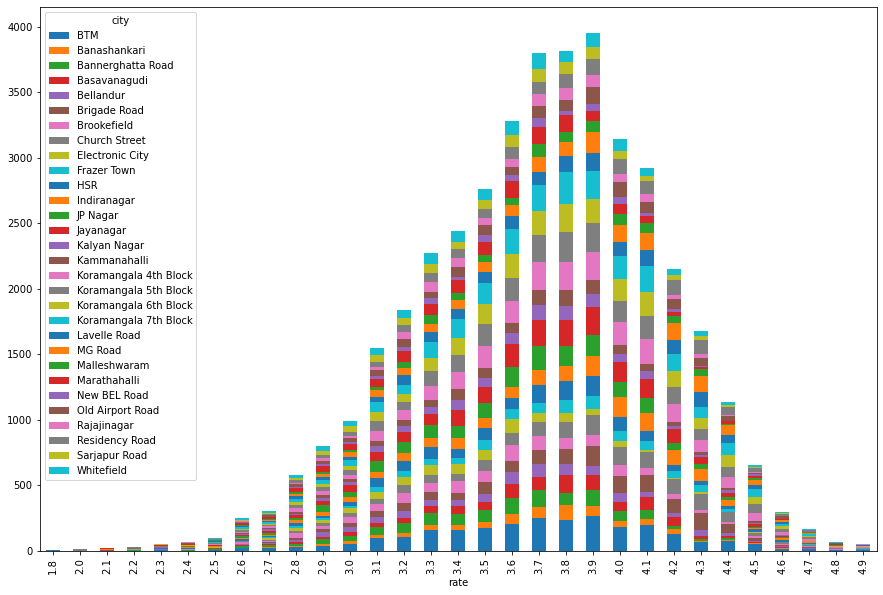

In [52]:
pd.crosstab(df.rate,df.city).plot(kind='bar', stacked = True)

# Model

In [53]:
from sklearn.model_selection import train_test_split

In [78]:
x = df_en.iloc[:,[1,2,4,5,6,8,9]]
y = df_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost
12393,0,1,216,32,34,50,450.0
42796,1,1,74,36,4,847,400.0
13761,1,1,24,15,2,1599,250.0
8957,0,0,1014,8,41,417,1300.0
43017,1,1,24,19,2,1020,500.0


In [79]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

model_params = {
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [10,100],
            'min_samples_leaf': [0.0001,0.00001]
        }
    },
    'Linear_regression' : {
        'model': LinearRegression(),
        'params': {
        }
    },
    'ExtraTrees': {
        'model': ExtraTreesRegressor(),
        'params' : {
            'n_estimators': [10,100],
            'min_samples_leaf': [0.0001,0.00001]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params' : {
            'min_samples_leaf': [0.001]
        }
    }
}

In [56]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
final = pd.DataFrame(scores,columns=['model','best_score','best_params'])
final

,model,best_score,best_params
0,random_forest,0.808960,"{'min_samples_leaf': 1e-05, 'n_estimators': 100}"
1,Linear_regression,0.233220,{}
2,ExtraTrees,0.802126,"{'min_samples_leaf': 1e-05, 'n_estimators': 100}"
3,DecisionTreeRegressor,0.450963,{'min_samples_leaf': 0.001}


In [85]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 200)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9506045084472772

In [80]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=200,min_samples_leaf=.00001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9365393963957017

### Extra Tree Regressors gives the best predictions

## Now predicting the Rate

In [86]:
new1 = pd.DataFrame(x)

In [87]:
new1.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost'],
      dtype='object')

In [88]:
new2 = df[['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost']]

In [136]:
new2.rename(columns = {'online_order': 'online_order1', 'book_table':'book_table1', 'votes':'votes1', 'location':'location1', 'rest_type':'rest_type1',
       'cuisines':'cuisines1', 'cost':'cost1'}, inplace= True )

In [137]:
new2

,online_order1,book_table1,votes1,location1,rest_type1,cuisines1,cost1
0,True,True,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,True,False,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,True,False,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,False,False,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,False,False,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0
...,...,...,...,...,...,...,...
51709,False,False,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0
51711,False,False,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0
51712,False,False,27,Whitefield,Bar,Continental,1500.0
51715,False,True,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0


In [138]:
new = pd.concat([new1,new2],axis =1)

In [139]:
new

,online_order,book_table,votes,location,rest_type,cuisines,cost,online_order1,book_table1,votes1,location1,rest_type1,cuisines1,cost1
0,0,0,775,0,0,0,800.0,True,True,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,0,1,787,0,0,1,800.0,True,False,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,0,1,918,0,1,2,800.0,True,False,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,1,1,88,0,2,3,300.0,False,False,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,1,1,166,1,0,4,600.0,False,False,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,1,1,34,25,28,204,800.0,False,False,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0
51711,1,1,81,25,28,761,800.0,False,False,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0
51712,1,1,27,25,17,240,1500.0,False,False,27,Whitefield,Bar,Continental,1500.0
51715,1,0,236,56,17,237,2500.0,False,True,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0


In [147]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 200)
ETree.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=200)

In [154]:
def predict_rate(online_order,book_table,votes, location, rest_type,
       cuisines, cost):
    a = np.zeros(len(x.columns))
    l0 = np.where(new.online_order1 == online_order)[0][0]
    a[0]=new.online_order.iloc[l0]
    l1 = np.where(new.book_table1 == book_table)[0][0]
    a[1]=new.book_table.iloc[l1]
    l2 = np.where(new.votes1 == votes)[0][0]
    a[2]=new.votes.iloc[l2]
    l3 = np.where(new.location1 == location)[0][0]
    a[3]=new.location.iloc[l3]
    l4 = np.where(new.rest_type1 == rest_type)[0][0]
    a[4]=new.rest_type.iloc[l4]
    l5 = np.where(new.cuisines1 == cuisines)[0][0]
    a[5]=new.cuisines.iloc[l5]
    l6 = np.where(new.cost1 == cost)[0][0]
    a[6]=new.cost.iloc[l6]
    
    return ETree.predict([a])[0]
    

In [155]:
predict_rate(True, True, 775, 'Banashankari', 'Casual Dining', 'North Indian, Mughlai', 800.0)

4.0735000000000054